<a id="1.1"></a>
<h3 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;">We continue to apply machine learning models to solve the classification problem. Same Credit Card customers dataset. Random Forest.</h3>

<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:150%;text-align:center;">Libraries</h3>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

### Data preparation

In [61]:
c_data = pd.read_csv('D:/Coursera/Анализ данных/DataSets/BankChurners/BankChurners.csv')
c_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [62]:
c_data = c_data.drop(['CLIENTNUM',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                       axis = 1)
c_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [63]:
c_data.Attrition_Flag = c_data.Attrition_Flag.replace({'Attrited Customer': 1,'Existing Customer': 0})
c_data.Gender = c_data.Gender.replace({'F': 1,'M': 0})
c_data = pd.concat([c_data, pd.get_dummies(c_data['Education_Level']).drop(columns = ['Unknown'])], axis = 1)
c_data = pd.concat([c_data, pd.get_dummies(c_data['Income_Category']).drop(columns = ['Unknown'])], axis = 1)
c_data = pd.concat([c_data, pd.get_dummies(c_data['Marital_Status']).drop(columns = ['Unknown'])], axis = 1)
c_data = pd.concat([c_data, pd.get_dummies(c_data['Card_Category']).drop(columns = ['Platinum'])], axis = 1)
c_data.drop(columns = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category'], inplace = True)
c_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,0,1,0,0,0,1,0,1,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,...,0,0,0,1,0,0,1,1,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,...,0,0,1,0,0,1,0,1,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,...,0,0,0,1,0,0,0,1,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,...,0,1,0,0,0,1,0,1,0,0


In [64]:
y = c_data['Attrition_Flag']
x = c_data.drop('Attrition_Flag', axis = 1)

x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(y_train_80.value_counts())
print(y_test_20.value_counts())

0    6799
1    1302
Name: Attrition_Flag, dtype: int64
0    1701
1     325
Name: Attrition_Flag, dtype: int64


<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;">Random Forest (raw data)</h1>

In [65]:
model = RandomForestClassifier()
model.fit(x_train_80, y_train_80)

RandomForestClassifier()

In [66]:
y_pred = model.predict(x_test_20)
print(metrics.classification_report(y_test_20, y_pred))
print(metrics.confusion_matrix(y_test_20, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.93      0.79      0.85       325

    accuracy                           0.96      2026
   macro avg       0.95      0.89      0.91      2026
weighted avg       0.96      0.96      0.96      2026

[[1683   18]
 [  69  256]]


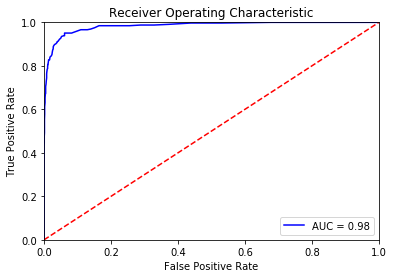

In [67]:
y_hat = model.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Let's check the importance of the features

In [68]:
df = pd.DataFrame({'feature': x.columns,
             'importance': model.feature_importances_}).sort_values('importance', ascending=False)
df = df.reset_index(drop=True)
df

,feature,importance
0,Total_Trans_Amt,0.174153
1,Total_Trans_Ct,0.168208
2,Total_Ct_Chng_Q4_Q1,0.108075
3,Total_Revolving_Bal,0.104718
4,Avg_Utilization_Ratio,0.062916
5,Total_Amt_Chng_Q4_Q1,0.062110
6,Total_Relationship_Count,0.061624
7,Credit_Limit,0.036347
8,Customer_Age,0.032597
9,Avg_Open_To_Buy,0.032496


### Let's take the first ten features

In [69]:
columns = df.iloc[:10, 0].to_list()

In [70]:
x_train_80 = x_train_80[columns]
x_train_80.head()

,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Total_Relationship_Count,Credit_Limit,Customer_Age,Avg_Open_To_Buy
2856,1755,42,0.448,2230,0.868,0.686,4,2570.0,36,340.0
6515,2282,38,0.583,0,0.000,0.849,5,25276.0,44,25276.0
7141,4277,89,0.854,915,0.078,0.892,6,11670.0,46,10755.0
632,1652,41,0.367,1593,0.510,0.869,3,3124.0,36,1531.0
3496,3874,72,0.714,1185,0.034,0.725,4,34516.0,50,33331.0


In [71]:
x_test_20 = x_test_20[columns]
x_test_20.head()

,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Total_Relationship_Count,Credit_Limit,Customer_Age,Avg_Open_To_Buy
2919,3250,70,0.591,2073,0.643,1.035,4,3226.0,65,1153.0
9301,14511,105,0.721,0,0.000,0.908,2,11463.0,41,11463.0
2936,3059,50,0.613,0,0.000,1.369,5,1677.0,31,1677.0
8134,4425,81,1.077,468,0.325,0.747,2,1438.3,51,970.3
5902,4927,73,0.738,1148,0.756,0.767,6,1519.0,51,371.0


In [72]:
model1 = RandomForestClassifier()
model1.fit(x_train_80, y_train_80)

RandomForestClassifier()

In [73]:
y_pred = model1.predict(x_test_20)
print(metrics.classification_report(y_test_20, y_pred))
print(metrics.confusion_matrix(y_test_20, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1701
           1       0.91      0.82      0.86       325

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

[[1674   27]
 [  57  268]]


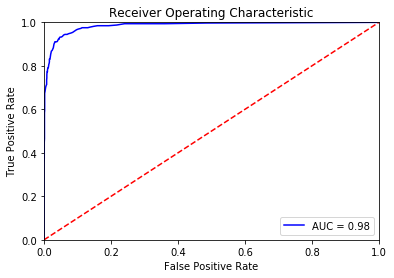

In [74]:
y_hat = model1.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Let's set the range of model parameters to find the optimal combination

In [76]:
params_set = {
    'n_estimators': range(50, 301, 50),
    'max_features': ['auto', 'sqrt'],
    'max_depth': range(5, 21, 5),
    'min_samples_split': range(9, 21, 3),
    'min_samples_leaf': range(9, 21, 3),
    'bootstrap': [True, False]
}

grid = GridSearchCV(estimator = model1,
                   param_grid = params_set,
                   scoring = 'roc_auc',
                   cv = 5,
                   n_jobs = -1)

grid.fit(x_train_80, y_train_80)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': range(5, 21, 5),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(9, 21, 3),
                         'min_samples_split': range(9, 21, 3),
                         'n_estimators': range(50, 301, 50)},
             scoring='roc_auc')

In [77]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'min_samples_split': 9,
 'n_estimators': 300}

### Let's fit our model with the optimal parameters

In [78]:
model2 = grid.best_estimator_
model2.fit(x_train_80, y_train_80)

RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=9,
                       min_samples_split=9, n_estimators=300)

### Evaluate the model with the probability prediction approach

In [79]:
d = {}
threshold_list = np.arange(0.05, 1, 0.05)
pred_proba_df = pd.DataFrame(model2.predict_proba(x_test_20))
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    f1_score = metrics.f1_score(y_test_20, Y_test_pred.iloc[:,1], pos_label = 1, average='binary')
    print('Our testing f1_score is {}'.format(f1_score))
    cm = metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1])
    d[f1_score] = cm
    print(metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_test_20, Y_test_pred.iloc[:,1]))
    
for i in d:
    print(i)
    print(d[i])


******** For i = 0.05 ******
Our testing f1_score is 0.6246362754607178
[[1317  384]
 [   3  322]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1701
           1       0.46      0.99      0.62       325

    accuracy                           0.81      2026
   macro avg       0.73      0.88      0.75      2026
weighted avg       0.91      0.81      0.83      2026


******** For i = 0.1 ******
Our testing f1_score is 0.7291428571428571
[[1470  231]
 [   6  319]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1701
           1       0.58      0.98      0.73       325

    accuracy                           0.88      2026
   macro avg       0.79      0.92      0.83      2026
weighted avg       0.93      0.88      0.89      2026


******** For i = 0.15000000000000002 ******
Our testing f1_score is 0.7801242236024846
[[1535  166]
 [  11  314]]
              precision    recal

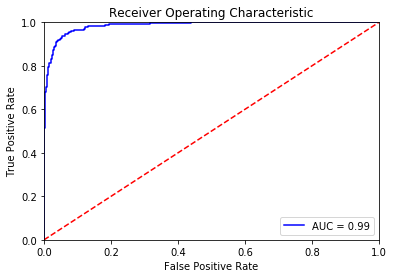

In [80]:
y_hat = model2.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">Random Forest (raw data) has: f-score = 0.86 (for class 1); precision = 0.86 (for class 1); recall = 0.87 (for class 1); AUC = 0.99</h1>

<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;">Random Forest (standardized data)</h1>

In [81]:
y = c_data['Attrition_Flag']
x = c_data.drop('Attrition_Flag', axis = 1)

In [82]:
pt = preprocessing.PowerTransformer()
normalize_data_x = pt.fit_transform(x)
   
normalize_data_x = pd.DataFrame(normalize_data_x, columns = x.columns)
normalize_data_x.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,-0.168365,-1.059956,0.516327,0.371128,0.762305,-1.458324,0.495883,0.962782,-0.003768,0.930320,...,-0.463363,2.494645,-0.422675,-0.736437,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.240794
1,0.331118,0.943436,1.979971,1.015094,1.417080,-1.458324,-0.406084,0.566512,0.076214,0.554222,...,-0.463363,-0.400859,-0.422675,1.357890,-0.282405,-0.928214,1.252337,0.270611,-0.107644,-0.240794
2,0.581381,-1.059956,0.516327,-0.009129,0.112803,-1.458324,-2.246757,-0.416953,-1.666149,-0.041640,...,-0.463363,-0.400859,2.365881,-0.736437,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.240794
3,-0.790608,0.943436,1.255981,-0.259895,-0.530415,1.525554,-1.318361,-0.456520,1.114008,-1.128002,...,-0.463363,-0.400859,-0.422675,1.357890,-0.282405,-0.928214,-0.798507,0.270611,-0.107644,-0.240794
4,-0.790608,-1.059956,0.516327,-1.827473,0.762305,-1.458324,-2.246757,-0.028788,-1.666149,0.205257,...,-0.463363,2.494645,-0.422675,-0.736437,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.240794


In [83]:
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(normalize_data_x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(y_train_80.value_counts())
print(y_test_20.value_counts())

0    6799
1    1302
Name: Attrition_Flag, dtype: int64
0    1701
1     325
Name: Attrition_Flag, dtype: int64


### Apply to the features selection method

In [84]:
st_model = RandomForestClassifier()
st_model.fit(x_train_80, y_train_80)

RandomForestClassifier()

In [85]:
y_pred = st_model.predict(x_test_20)
print(metrics.classification_report(y_test_20, y_pred))
print(metrics.confusion_matrix(y_test_20, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.94      0.77      0.84       325

    accuracy                           0.95      2026
   macro avg       0.95      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026

[[1684   17]
 [  75  250]]


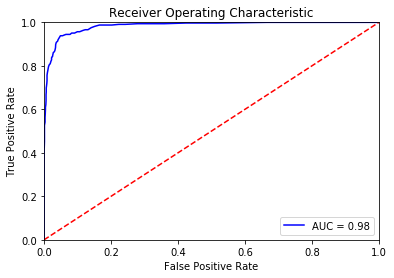

In [86]:
y_hat = st_model.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
df = pd.DataFrame({'feature': normalize_data_x.columns,
             'importance': st_model.feature_importances_}).sort_values('importance', ascending=False)
df = df.reset_index(drop=True)
df

,feature,importance
0,Total_Trans_Amt,0.179073
1,Total_Trans_Ct,0.155792
2,Total_Revolving_Bal,0.108190
3,Total_Ct_Chng_Q4_Q1,0.105370
4,Total_Relationship_Count,0.064702
5,Total_Amt_Chng_Q4_Q1,0.064077
6,Avg_Utilization_Ratio,0.062680
7,Credit_Limit,0.037867
8,Avg_Open_To_Buy,0.034705
9,Customer_Age,0.031278


### Let's take the first ten features

In [88]:
columns = df.iloc[:10, 0].to_list()

In [89]:
x_train_80 = x_train_80[columns]
x_test_20 = x_test_20[columns]

In [90]:
st_model1 = RandomForestClassifier()
st_model1.fit(x_train_80, y_train_80)

RandomForestClassifier()

In [91]:
y_pred = st_model1.predict(x_test_20)
print(metrics.classification_report(y_test_20, y_pred))
print(metrics.confusion_matrix(y_test_20, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.91      0.82      0.86       325

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

[[1676   25]
 [  60  265]]


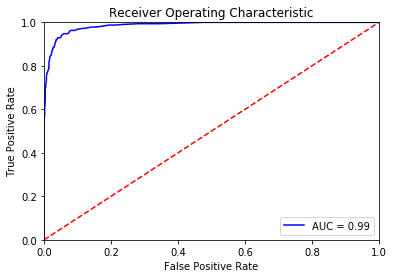

In [92]:
y_hat = st_model1.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Let's set the range of model parameters to find the optimal combination

In [93]:
params_set = {
    'n_estimators': range(100, 301, 100),
    'max_depth': range(10, 21, 5),
    'min_samples_split': range(9, 16, 3),
    'min_samples_leaf': range(9, 16, 3),
    'bootstrap': [True, False]
}

grid = GridSearchCV(estimator = st_model1,
                   param_grid = params_set,
                   scoring = 'roc_auc',
                   cv = 5,
                   n_jobs = -1)

grid.fit(x_train_80, y_train_80)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': range(10, 21, 5),
                         'min_samples_leaf': range(9, 16, 3),
                         'min_samples_split': range(9, 16, 3),
                         'n_estimators': range(100, 301, 100)},
             scoring='roc_auc')

In [94]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'min_samples_leaf': 9,
 'min_samples_split': 15,
 'n_estimators': 300}

In [95]:
st_model2 = grid.best_estimator_
st_model2.fit(x_train_80, y_train_80)

RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=9,
                       min_samples_split=15, n_estimators=300)

### Evaluating

In [96]:
d = {}
threshold_list = np.arange(0.05, 1, 0.05)
pred_proba_df = pd.DataFrame(st_model2.predict_proba(x_test_20))
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    f1_score = metrics.f1_score(y_test_20, Y_test_pred.iloc[:,1], pos_label = 1, average='binary')
    print('Our testing f1_score is {}'.format(f1_score))
    cm = metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1])
    d[f1_score] = cm
    print(metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_test_20, Y_test_pred.iloc[:,1]))
    
for i in d:
    print(i)
    print(d[i])


******** For i = 0.05 ******
Our testing f1_score is 0.6270691333982473
[[1321  380]
 [   3  322]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.87      1701
           1       0.46      0.99      0.63       325

    accuracy                           0.81      2026
   macro avg       0.73      0.88      0.75      2026
weighted avg       0.91      0.81      0.83      2026


******** For i = 0.1 ******
Our testing f1_score is 0.726027397260274
[[1468  233]
 [   7  318]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1701
           1       0.58      0.98      0.73       325

    accuracy                           0.88      2026
   macro avg       0.79      0.92      0.83      2026
weighted avg       0.93      0.88      0.89      2026


******** For i = 0.15000000000000002 ******
Our testing f1_score is 0.7810945273631842
[[1536  165]
 [  11  314]]
              precision    recall

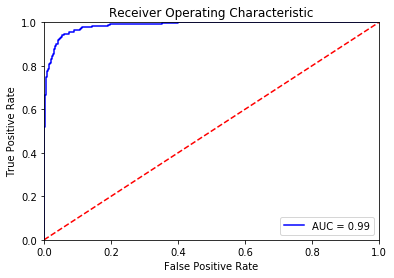

In [97]:
y_hat = st_model2.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">Random Forest (standardized data) has: f-score = 0.86 (for class 1); precision = 0.83 (for class 1); recall = 0.89 (for class 1); AUC = 0.99</h1>

<a id="3"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;">Random Forest SMOTE (standardized data)</h1>

### Let's leave 20% of the data in which there will be no synthesized samples, for the purity of the test

In [98]:
y = c_data['Attrition_Flag']
x = c_data.drop('Attrition_Flag', axis = 1)
x_c_data, x_realtest, y_c_data, y_realtest = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [99]:
oversample = SMOTE()
X, Y = oversample.fit_resample(x_c_data, y_c_data)

In [100]:
print(len(Y))
print(X.info())

13598
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13598 entries, 0 to 13597
Data columns (total 32 columns):
Customer_Age                13598 non-null int64
Gender                      13598 non-null int64
Dependent_count             13598 non-null int64
Months_on_book              13598 non-null int64
Total_Relationship_Count    13598 non-null int64
Months_Inactive_12_mon      13598 non-null int64
Contacts_Count_12_mon       13598 non-null int64
Credit_Limit                13598 non-null float64
Total_Revolving_Bal         13598 non-null int64
Avg_Open_To_Buy             13598 non-null float64
Total_Amt_Chng_Q4_Q1        13598 non-null float64
Total_Trans_Amt             13598 non-null int64
Total_Trans_Ct              13598 non-null int64
Total_Ct_Chng_Q4_Q1         13598 non-null float64
Avg_Utilization_Ratio       13598 non-null float64
College                     13598 non-null uint8
Doctorate                   13598 non-null uint8
Graduate                    13598 non-null

In [101]:
Y.value_counts()

1    6799
0    6799
Name: Attrition_Flag, dtype: int64

In [102]:
pt = preprocessing.PowerTransformer()
normalize_data_x = pt.fit_transform(X)
   
normalize_data_x = pd.DataFrame(normalize_data_x, columns = X.columns)
normalize_data_x.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,-1.408534,1.042067,-1.904026,-1.609384,0.417893,0.723624,-0.514517,-0.720249,1.005342,-1.801222,...,-0.373919,-0.315780,-0.341339,1.560911,-0.219124,1.344962,-0.653003,0.295496,-0.08779,-0.200596
1,-0.327092,-0.959632,0.640495,-0.008601,1.022837,-0.359207,0.462822,1.521622,-1.312593,1.564422,...,-0.373919,3.166763,-0.341339,-0.640652,-0.219124,-0.743515,1.531385,-3.384137,-0.08779,4.985149
2,-0.054469,-0.959632,-0.165497,-0.824036,1.595887,0.723624,-1.489913,0.926903,0.521693,0.857592,...,-0.373919,-0.315780,2.929642,-0.640652,-0.219124,1.344962,-0.653003,0.295496,-0.08779,-0.200596
3,-1.408534,1.042067,-0.165497,-1.609384,-0.227780,-1.630629,0.462822,-0.463805,0.812375,-0.681265,...,-0.373919,-0.315780,-0.341339,1.560911,-0.219124,1.344962,-0.653003,0.295496,-0.08779,-0.200596
4,0.493240,-0.959632,-1.006367,0.549694,0.417893,-0.359207,0.462822,1.725222,0.653192,1.797606,...,-0.373919,-0.315780,-0.341339,-0.640652,-0.219124,-0.743515,1.531385,0.295496,-0.08779,-0.200596


In [103]:
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(normalize_data_x, Y, test_size=0.2, random_state=42,
                                                                shuffle=True, stratify=Y)
print(y_train_80.value_counts())
print(y_test_20.value_counts())

1    5439
0    5439
Name: Attrition_Flag, dtype: int64
1    1360
0    1360
Name: Attrition_Flag, dtype: int64


In [104]:
smote_model = RandomForestClassifier()
smote_model.fit(x_train_80, y_train_80)

RandomForestClassifier()

In [105]:
y_pred = smote_model.predict(x_test_20)
print(metrics.classification_report(y_test_20, y_pred))
print(metrics.confusion_matrix(y_test_20, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1360
           1       0.98      0.98      0.98      1360

    accuracy                           0.98      2720
   macro avg       0.98      0.98      0.98      2720
weighted avg       0.98      0.98      0.98      2720

[[1329   31]
 [  29 1331]]


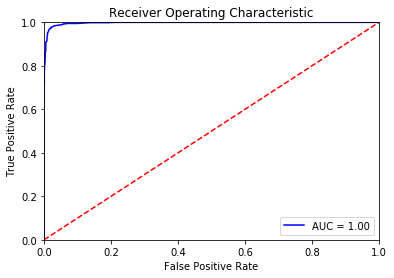

In [106]:
y_hat = smote_model.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
df = pd.DataFrame({'feature': normalize_data_x.columns,
             'importance': st_model.feature_importances_}).sort_values('importance', ascending=False)
df = df.reset_index(drop=True)
df

,feature,importance
0,Total_Trans_Amt,0.179073
1,Total_Trans_Ct,0.155792
2,Total_Revolving_Bal,0.108190
3,Total_Ct_Chng_Q4_Q1,0.105370
4,Total_Relationship_Count,0.064702
5,Total_Amt_Chng_Q4_Q1,0.064077
6,Avg_Utilization_Ratio,0.062680
7,Credit_Limit,0.037867
8,Avg_Open_To_Buy,0.034705
9,Customer_Age,0.031278


### Let's take the first ten features

In [108]:
columns = df.iloc[:10, 0].to_list()

In [109]:
x_train_80 = x_train_80[columns]
x_test_20 = x_test_20[columns]

In [111]:
smote_model1 = RandomForestClassifier()
smote_model1.fit(x_train_80, y_train_80)

RandomForestClassifier()

In [112]:
y_pred = smote_model1.predict(x_test_20)
print(metrics.classification_report(y_test_20, y_pred))
print(metrics.confusion_matrix(y_test_20, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1360
           1       0.97      0.98      0.98      1360

    accuracy                           0.98      2720
   macro avg       0.98      0.98      0.98      2720
weighted avg       0.98      0.98      0.98      2720

[[1320   40]
 [  24 1336]]


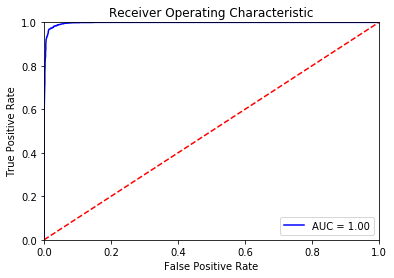

In [113]:
y_hat = smote_model1.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Let's set the range of model parameters to find the optimal combination

In [114]:
params_set = {
    'n_estimators': range(100, 301, 100),
    'max_depth': range(10, 21, 5),
    'min_samples_split': range(9, 16, 3),
    'min_samples_leaf': range(9, 16, 3),
    'bootstrap': [True, False]
}

grid = GridSearchCV(estimator = smote_model1,
                   param_grid = params_set,
                   scoring = 'roc_auc',
                   cv = 5,
                   n_jobs = -1)

grid.fit(x_train_80, y_train_80)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': range(10, 21, 5),
                         'min_samples_leaf': range(9, 16, 3),
                         'min_samples_split': range(9, 16, 3),
                         'n_estimators': range(100, 301, 100)},
             scoring='roc_auc')

In [115]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'min_samples_leaf': 9,
 'min_samples_split': 12,
 'n_estimators': 300}

In [116]:
smote_model2 = grid.best_estimator_
smote_model2.fit(x_train_80, y_train_80)

RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=9,
                       min_samples_split=12, n_estimators=300)

### Evaluating

In [117]:
d = {}
threshold_list = np.arange(0.05, 1, 0.05)
pred_proba_df = pd.DataFrame(smote_model2.predict_proba(x_test_20))
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    f1_score = metrics.f1_score(y_test_20, Y_test_pred.iloc[:,1], pos_label = 1, average='binary')
    print('Our testing f1_score is {}'.format(f1_score))
    cm = metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1])
    d[f1_score] = cm
    print(metrics.confusion_matrix(y_test_20, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_test_20, Y_test_pred.iloc[:,1]))
    
for i in d:
    print(i)
    print(d[i])


******** For i = 0.05 ******
Our testing f1_score is 0.8513302034428796
[[ 885  475]
 [   0 1360]]
              precision    recall  f1-score   support

           0       1.00      0.65      0.79      1360
           1       0.74      1.00      0.85      1360

    accuracy                           0.83      2720
   macro avg       0.87      0.83      0.82      2720
weighted avg       0.87      0.83      0.82      2720


******** For i = 0.1 ******
Our testing f1_score is 0.8941485864562787
[[1038  322]
 [   0 1360]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.87      1360
           1       0.81      1.00      0.89      1360

    accuracy                           0.88      2720
   macro avg       0.90      0.88      0.88      2720
weighted avg       0.90      0.88      0.88      2720


******** For i = 0.15000000000000002 ******
Our testing f1_score is 0.9186085781830462
[[1119  241]
 [   0 1360]]
              precision    recal

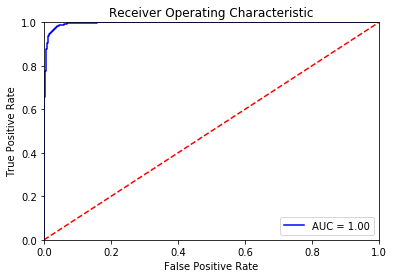

In [118]:
y_hat = smote_model2.predict_proba(x_test_20)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test_20, y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">Random Forest SMOTE (standardized data), as a result has: f-score = 0.97 (for class 1); precision = 0.96 (for class 1); recall = 0.98 (for class 1); AUC = 1.00</h1>

### Now we will make a test on real (no synthetic) data - 'x_realtest', 'y_realtest'

In [119]:
x_realtest = x_realtest[columns]
x_realtest.head()

,Total_Trans_Amt,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit,Avg_Open_To_Buy,Customer_Age
2919,3250,70,2073,0.591,4,1.035,0.643,3226.0,1153.0,65
9301,14511,105,0,0.721,2,0.908,0.000,11463.0,11463.0,41
2936,3059,50,0,0.613,5,1.369,0.000,1677.0,1677.0,31
8134,4425,81,468,1.077,2,0.747,0.325,1438.3,970.3,51
5902,4927,73,1148,0.738,6,0.767,0.756,1519.0,371.0,51


In [120]:
pt = preprocessing.PowerTransformer()
n_x_realtest = pt.fit_transform(x_realtest)

n_x_realtest = pd.DataFrame(n_x_realtest, columns = x_realtest.columns)
n_x_realtest.head()

,Total_Trans_Amt,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit,Avg_Open_To_Buy,Customer_Age
0,-0.112032,0.238679,0.901548,-0.494896,0.109270,1.269512,1.299375,-0.496429,-0.855880,2.333333
1,2.028648,1.646171,-1.648484,0.133706,-1.173477,0.765380,-1.193455,0.847079,0.868845,-0.624164
2,-0.207954,-0.644556,-1.648484,-0.384502,0.756987,2.367599,-1.193455,-1.394298,-0.587913,-1.848217
3,0.364949,0.696837,-0.307447,1.611569,-1.173477,0.035684,0.507186,-1.629254,-0.977582,0.605193
4,0.526505,0.365312,0.332862,0.211904,1.407971,0.132599,1.483639,-1.544591,-1.636531,0.605193


In [121]:
pred_proba_df = pd.DataFrame(smote_model2.predict_proba(n_x_realtest))
threshold_list = np.arange(0.025, 1, 0.025)
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    f1_score = metrics.f1_score(y_realtest, Y_test_pred.iloc[:,1], pos_label = 1, average = 'binary')
    print('Our testing f1_score is {}'.format(f1_score))

    print(metrics.confusion_matrix(y_realtest, Y_test_pred.iloc[:,1]))
    print(metrics.classification_report(y_realtest, Y_test_pred.iloc[:,1]))


******** For i = 0.025 ******
Our testing f1_score is 0.3343621399176955
[[ 407 1294]
 [   0  325]]
              precision    recall  f1-score   support

           0       1.00      0.24      0.39      1701
           1       0.20      1.00      0.33       325

    accuracy                           0.36      2026
   macro avg       0.60      0.62      0.36      2026
weighted avg       0.87      0.36      0.38      2026


******** For i = 0.05 ******
Our testing f1_score is 0.3604004449388209
[[ 552 1149]
 [   1  324]]
              precision    recall  f1-score   support

           0       1.00      0.32      0.49      1701
           1       0.22      1.00      0.36       325

    accuracy                           0.43      2026
   macro avg       0.61      0.66      0.43      2026
weighted avg       0.87      0.43      0.47      2026


******** For i = 0.07500000000000001 ******
Our testing f1_score is 0.38185032410135533
[[ 653 1048]
 [   1  324]]
              precision    re

Our testing f1_score is 0.70242656449553
[[1518  183]
 [  50  275]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1701
           1       0.60      0.85      0.70       325

    accuracy                           0.88      2026
   macro avg       0.78      0.87      0.82      2026
weighted avg       0.91      0.88      0.89      2026


******** For i = 0.65 ******
Our testing f1_score is 0.7095926412614979
[[1535  166]
 [  55  270]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1701
           1       0.62      0.83      0.71       325

    accuracy                           0.89      2026
   macro avg       0.79      0.87      0.82      2026
weighted avg       0.91      0.89      0.90      2026


******** For i = 0.675 ******
Our testing f1_score is 0.7117726657645466
[[1550  151]
 [  62  263]]
              precision    recall  f1-score   support

           0       0.9

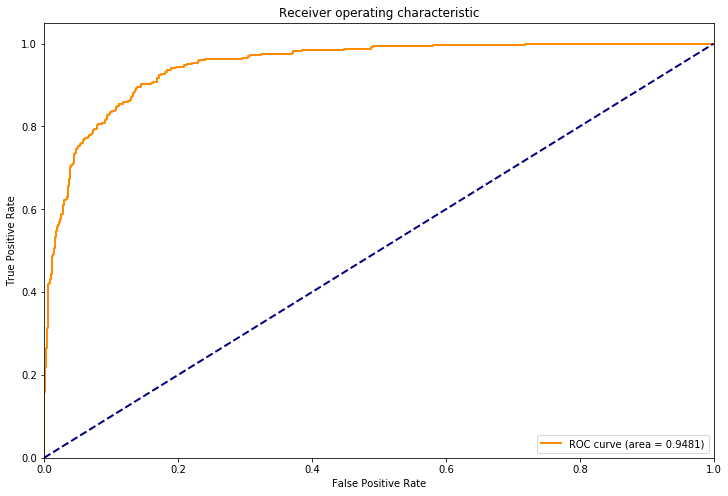

In [122]:
y_hat_sm = smote_model2.predict_proba(n_x_realtest)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_realtest, y_hat_sm)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize = (12, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<a id="3"></a>
<h1 style="background-color:powderblue;font-family:newtimeroman;font-size:150%;text-align:center;">Random Forest SMOTE (standardized data) - no synthetic test, as a result has: f-score = 0.74 (for class 1); precision = 0.75 (for class 1); recall = 0.74 (for class 1); AUC = 0.9481</h1>